# Convolutional Neural Networks
<hr style="border:2px solid #ff0000"></hr>

<b>Tovi R. Macalisay</b>
<br>Comp Tech Student

## Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import layers, models #ignore resolveed

In [ ]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
    tf.config.experimental.set_memory_growth(gpus[0], True)
else:
    print("Failed to detect a GPU.")


Failed to detect a GPU.


IndexError: list index out of range

## Split the Dataset

In [2]:
BATCH_SIZE = 32
IMG_SIZE = (128,128)  
DATA_DIR = 'Assets'   
# para sa validation split 20%
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# normalize niya ang layer
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# optimization
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 677 files belonging to 2 classes.
Using 542 files for training.
Found 677 files belonging to 2 classes.
Using 135 files for validation.


## Model Design

In [3]:
model = models.Sequential([
    layers.Input(shape=(128,128,3)),
    layers.Conv2D(32,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705,921 (14.14 MB)

 Trainable params: 3,705,921 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

## Training

In [4]:
model.compile(
    optimizer='adam',               
    loss='binary_crossentropy',      
    metrics=['accuracy']             
)

epochs =20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 375ms/step - accuracy: 0.6218 - loss: 0.9352 - val_accuracy: 0.6593 - val_loss: 0.5841
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 352ms/step - accuracy: 0.6827 - loss: 0.5686 - val_accuracy: 0.6593 - val_loss: 0.5651
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 354ms/step - accuracy: 0.6827 - loss: 0.5928 - val_accuracy: 0.6593 - val_loss: 0.5772
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 461ms/step - accuracy: 0.6827 - loss: 0.5466 - val_accuracy: 0.6593 - val_loss: 0.5561
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 563ms/step - accuracy: 0.6531 - loss: 0.5647 - val_accuracy: 0.6593 - val_loss: 0.5738
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 724ms/step - accuracy: 0.6956 - loss: 0.5157 - val_accuracy: 0.6593 - val_loss: 0.5289
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 429ms/step - accuracy: 0.6771 - loss: 0.5295 - val_accuracy: 0.6519 - val_loss: 0.5491
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 405ms/step - accuracy: 0.7122 - loss: 0.4848 - val_accuracy:

## Graphs

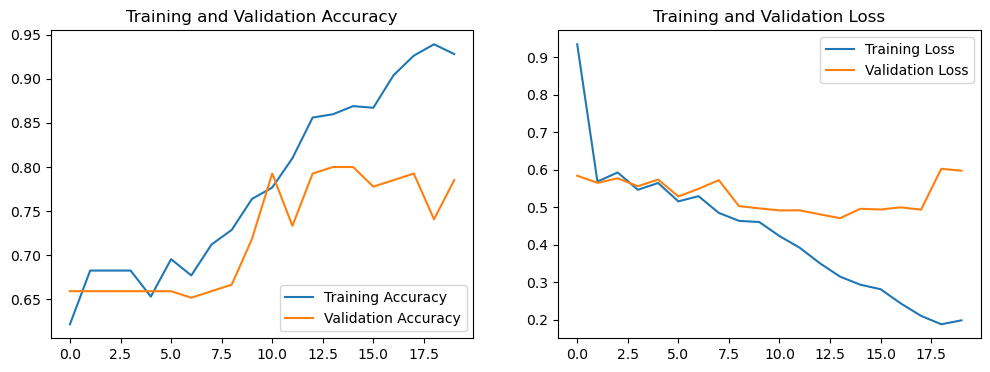

In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Images Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
RESULT: Pencil
accuracy: 97.43%


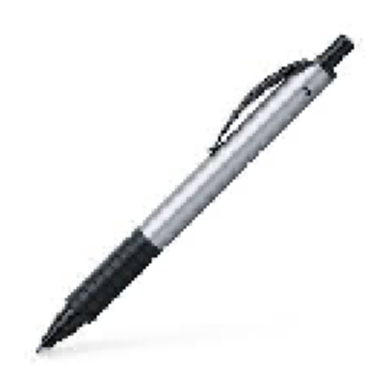

In [6]:
#
image_path = 'Assets\pen1.jpg'

img = tf.keras.utils.load_img(
    image_path, target_size=(128, 128)
)

img_array = tf.keras.utils.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) 

img_array = img_array / 255.0

predictions = model.predict(img_array)
score = predictions[0][0]

if score > 0.5:
    print(f"RESULT: Pencil")
    print(f"accuracy: {100 * score:.2f}%")
else:
    print(f"RESULT: Pen")
    print(f"accuracy: {100 * (1 - score):.2f}%")

plt.imshow(img)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
RESULT: Pencil
accuracy: 99.35%


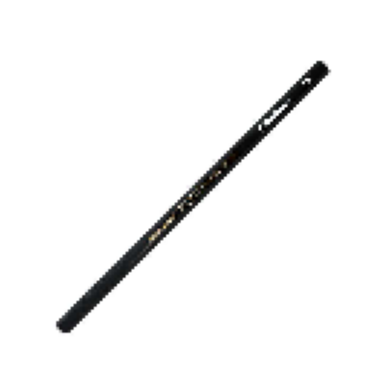

In [7]:
image_path = 'Assets\pencil.jpg'

img = tf.keras.utils.load_img(
    image_path, target_size=(128, 128)
)

img_array = tf.keras.utils.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) 

img_array = img_array / 255.0

predictions = model.predict(img_array)
score = predictions[0][0]

if score > 0.5:
    print(f"RESULT: Pencil")
    print(f"accuracy: {100 * score:.2f}%")
else:
    print(f"RESULT: Pen")
    print(f"accuracy: {100 * (1 - score):.2f}%")

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
RESULT: Pencil
accuracy: 99.99%


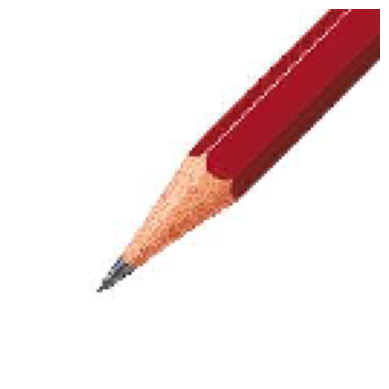

In [8]:
image_path = 'Assets\pencil1.jpg'

img = tf.keras.utils.load_img(
    image_path, target_size=(128, 128)
)

img_array = tf.keras.utils.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) 

img_array = img_array / 255.0

predictions = model.predict(img_array)
score = predictions[0][0]

if score > 0.5:
    print(f"RESULT: Pencil")
    print(f"accuracy: {100 * score:.2f}%")
else:
    print(f"RESULT: Pen")
    print(f"accuracy: {100 * (1 - score):.2f}%")

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
RESULT: Pencil
accuracy: 94.68%


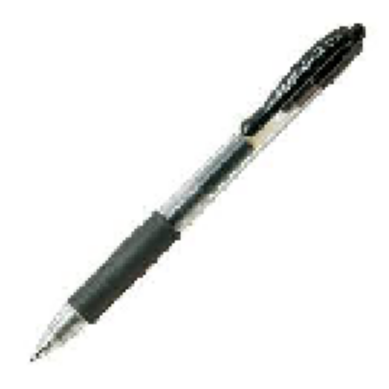

In [9]:
image_path = 'Assets\pen.jpg'

img = tf.keras.utils.load_img(
    image_path, target_size=(128, 128)
)

img_array = tf.keras.utils.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) 

img_array = img_array / 255.0

predictions = model.predict(img_array)
score = predictions[0][0]

if score > 0.5:
    print(f"RESULT: Pencil")
    print(f"accuracy: {100 * score:.2f}%")
else:
    print(f"RESULT: Pen")
    print(f"accuracy: {100 * (1 - score):.2f}%")

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()

## Reflection

<h4>There is two major problem i encounter while making this model. The first one is when i was making the model design when my model design is too high the training loss is too high as well. Lastly when doing the prediction test for the pen and pencil where the model predict the pencil.jpg that it's a pen and the other way around, i thought the problem was in the training or the model design and the way i fix it is pretty stupid i turn the less than sign to a greater than sign. </h4>